## Questions:
Your task is to answer the following questions:<br>
a. How to properly evaluate the performance of affiliates from perspective of our company?<br>
b. Which affiliates are not profitable? Which affiliates should we continue to work with?


## Summary: 

1) We have 2 top affiliates with user ids <b>a3ae3125fe</b> and <b>a12f7b9ea8</b>. 
They brought us 1 050 221.63 RUB and 962 876.45 RUB respectively. These 2 affiliates covered ~31% of the whole income.

2) There are 9 affiliates which brought ~53% of the whole income, user_ids for these affiliates are:
- <b>e8b0a5f539</b>
- <b>ce913ea790</b>
- <b>a8f9e6bfe7</b>
- <b>a12f7b9ea8</b>
- <b>5f745a74ea</b>
- <b>c52d9139a2</b>
- <b>3edee82c4b</b>
- <b>a3ae3125fe</b>
- <b>f0e3b2548a</b>

3) If we talk about efficiency of each affiliate, we can take a look at mean order price of  each affilate. 
The greatest mean_order price has affiliate with id <b>f4cdfaf3a7</b>. 
But this affiliate made only one order and it tells us almost nothing about its behaviour.

The affiliate with id <b>c52d9139a2</b> made 78 orders and its mean order price almost the highest among all other affiliates. So we can assume that if we stimulate this affiliate making more orders it will be the most efficient way to increase our income. 

4) "The worst" affiliates for us, which are not profitable and even generate loss for us, are those with the following ids: 
- <b>020d1cb3a9</b>
- <b>321c56f428</b>
- <b>00143ea850</b>

<b> Further possible steps to implement: </b>
- devide all affiliates in different categories according to their behaviour (mean time between their orders, orders amount, orders prices etc) by applying KMeans method.
- generate a script which will help us make predictions whether a new user will be "super efficient" or not profitable for us according to a data we get about him during the first several orders. It can be implemented by using Random Forsets.


## Code:

In [1]:
import pandas as pd

In [2]:
orders = pd.read_csv('data/orders_task3.csv')
promocodes = pd.read_csv('data/promocodes_task3.csv')
users = pd.read_csv('data/users_task3.csv')

In [3]:
orders.head()

,order_id,s_at,price,credit,to_pay,user_id
0,ab9bfd247c,2015-01-01 00:15:00.000,4306.624048,0.0,0.000000,39844e5017
1,84fcde29cd,2015-01-01 00:15:00.000,619.669444,0.0,0.000000,561557d249
2,ae381649dc,2015-01-01 00:15:00.088,4585.154861,0.0,0.000000,1042717eab
3,a5e7a88d17,2015-01-01 00:20:00.000,2056.213621,0.0,2056.213621,34522dfa68
4,08cf450688,2015-01-01 00:20:00.000,3228.607512,0.0,0.000000,6229058c8d


In [4]:
promocodes.head()

,code,user_id
0,2060bc929,acbffed967
1,16ffbbdd0,23c5ee42a9
2,2b619e6e2,aea4d361c4
3,557d5e74f,744b730a41
4,b6d28ef96,644cf7fe7b


In [5]:
users.head()

,user_id,roles,utm_c
0,03efc1f069,[],2a429d2ee
1,5306565935,[],ae024364a
2,fb56e1f978,[],ae024364a
3,c742e04d7b,[],ae024364a
4,e10683e16c,[],b217f631f


In [6]:
users.roles.unique()

array(['[]', "['partner', 'driver']", "['cross-promo']",
       "['agent', 'pr_manager']", "['driver', 'partner']", "['driver']",
       "['affiliate']", "['company']", "['partner']", "['pr_manager']",
       "['pr_manager', 'cross-promo']", "['fleet_manager']",
       "['agent', 'pr_manager', 'partner', 'driver']",
       "['sales_manager', 'fleet_manager', 'account_manager']",
       "['controller', 'agent', 'company', 'sales_manager', 'pr_manager', 'partner', 'driver']",
       "['fleet_manager', 'partner', 'driver']",
       "['pr_manager', 'agent', 'partner', 'driver']",
       "['controller', 'partner']",
       "['partner', 'driver', 'fleet_manager']"], dtype=object)

In [7]:
# create a df we are going to work with, this df will include only user_ids with 'affiliate' role

df = users[users.roles == "['affiliate']"].drop(['roles', 'utm_c'], axis=1)

In [8]:
df.head()

,user_id
1056,d891c8305a
1088,f94d3de761
2293,b1a6cf0230
2788,e7717637a4
2853,d774d65c49


In [9]:
# create a df with orders summary for every user_id

orders_summary = orders.groupby('user_id').agg({
        'price': 'sum',
        'credit': 'sum',
        'to_pay': 'sum',
        'order_id': 'count'
    }).reset_index() \
      .rename(columns={
        'price': 'total_price',
        'credit': 'total_credit',
        'to_pay': 'total_to_pay',
        'order_id': 'orders'
    })

In [10]:
orders_summary.head()

,user_id,total_price,total_credit,total_to_pay,orders
0,00003f9413,3027.434223,500.0,300.000000,2
1,0000e3575c,1749.448217,500.0,0.000000,1
2,0005012710,765.642246,500.0,0.000000,1
3,00067c7cff,2766.634430,0.0,0.000000,2
4,000781601d,2272.739954,0.0,2272.739954,1


In [11]:
# merging df and orders_summary (we'll use left join in order not to lose user_ids 
# which are not presented in orders_summary)

df = df.merge(orders_summary, on='user_id', how='left')

In [12]:
df.head()

,user_id,total_price,total_credit,total_to_pay,orders
0,d891c8305a,3838.370744,1000.0,0.000000,2.0
1,f94d3de761,21820.701114,8500.0,2378.184304,17.0
2,b1a6cf0230,25820.771214,5000.0,0.000000,10.0
3,e7717637a4,50860.852998,20000.0,0.000000,42.0
4,d774d65c49,50206.185082,14500.0,0.000000,29.0


In [13]:
# checking NA values

df[df.total_price.isna() == True]

,user_id,total_price,total_credit,total_to_pay,orders
8,df7fe09b2f,NaN,NaN,NaN,NaN
14,68acd1fe87,NaN,NaN,NaN,NaN
32,a3b40935f1,NaN,NaN,NaN,NaN
33,943404a6ae,NaN,NaN,NaN,NaN
38,f4e89f0177,NaN,NaN,NaN,NaN
41,a005934325,NaN,NaN,NaN,NaN
44,974ec16bbe,NaN,NaN,NaN,NaN
46,f0d6224a85,NaN,NaN,NaN,NaN
60,1f2011f7fb,NaN,NaN,NaN,NaN
68,e5046651b6,NaN,NaN,NaN,NaN


In [14]:
# dropping NA values

df = df.dropna()

In [15]:
# rounding total_price to 2 decimal places and mapping int function to every order

df.total_price = df.total_price.round(2)
df.orders = df.orders.map(int)

In [16]:
# adding total_clean_price columns 
# which is the result of total_price - total_credit - total_to_pay

df['total_clean_price'] = df.total_price - df.total_credit - df.total_to_pay

# adding mean_order_price which represents the mean price for order for each user

df['mean_order_price'] = df.total_clean_price / df.orders

Now, since we have total_clean_price column, we will pay attention to it and hence we don't neen columns total_price, total_credit, total_to_pay, let's remove them:

In [17]:
df = df.drop(['total_price', 'total_credit', 'total_to_pay'], axis=1)

Now let's add a column 'impact', which will represent the impact of every user's total_clean_price on the global total clean price:

In [18]:
df['impact'] = ((df.total_clean_price/df.total_clean_price.sum())*100)

In [19]:
# sorting values by 'total_clean_price'

df.sort_values(by='total_clean_price', ascending=False)

,user_id,orders,total_clean_price,mean_order_price,impact
49,a3ae3125fe,802,1050221.63,1309.503279,15.920450
29,a12f7b9ea8,538,962876.45,1789.733178,14.596372
26,ce913ea790,319,374360.63,1173.544295,5.674983
27,a8f9e6bfe7,233,236627.38,1015.568155,3.587066
83,f0e3b2548a,194,208217.35,1073.285309,3.156395
...,...,...,...,...,...
80,4907b9bf1f,2,790.64,395.320000,0.011985
97,96f303087b,1,471.21,471.210000,0.007143
115,020d1cb3a9,1,-200.00,-200.000000,-0.003032
126,321c56f428,1,-200.00,-200.000000,-0.003032


In [20]:
df[df.impact > 2]

,user_id,orders,total_clean_price,mean_order_price,impact
17,e8b0a5f539,154,1.558192e+05,1011.813312,2.362085
26,ce913ea790,319,3.743606e+05,1173.544295,5.674983
27,a8f9e6bfe7,233,2.366274e+05,1015.568155,3.587066
29,a12f7b9ea8,538,9.628764e+05,1789.733178,14.596372
37,5f745a74ea,98,1.369295e+05,1397.240204,2.075733
42,c52d9139a2,78,1.997823e+05,2561.312023,3.028527
47,3edee82c4b,190,1.895800e+05,997.789474,2.873868
49,a3ae3125fe,802,1.050222e+06,1309.503279,15.920450
83,f0e3b2548a,194,2.082174e+05,1073.285309,3.156395


In [21]:
# sum of impact of affiliates, that brought more than 2% of total impact

df.impact[df.impact > 2].sum()

53.2754783138471

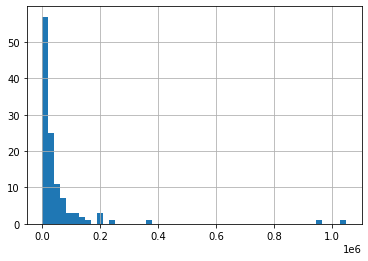

In [22]:
df.total_clean_price.hist(bins=50)

As we can see from the histogram and df above, we have 2 top affiliates with user ids <b>a3ae3125fe</b> and <b>a12f7b9ea8</b>. They brought us 1 050 221.63 RUB and 962 876.45 RUB respectively. These 2 affiliates covered ~31% of income.

There are 9 affiliates which brought ~53% of the whole income, user_ids for theses affiliates are:


In [23]:
df.user_id[df.impact > 2].to_frame()

,user_id
17,e8b0a5f539
26,ce913ea790
27,a8f9e6bfe7
29,a12f7b9ea8
37,5f745a74ea
42,c52d9139a2
47,3edee82c4b
49,a3ae3125fe
83,f0e3b2548a


In [24]:
# sorting values by 'total_clean_price'

df.sort_values(by='mean_order_price', ascending=False)

,user_id,orders,total_clean_price,mean_order_price,impact
131,f4cdfaf3a7,1,3329.220000,3329.220000,0.050468
31,2b6a2f2ffb,4,11294.030000,2823.507500,0.171208
42,c52d9139a2,78,199782.337829,2561.312023,3.028527
76,7158fc0aec,5,10800.730000,2160.146000,0.163730
59,5866a635ad,8,17204.850000,2150.606250,0.260811
...,...,...,...,...,...
80,4907b9bf1f,2,790.640000,395.320000,0.011985
98,e782a8f47d,8,1932.250000,241.531250,0.029291
53,00143ea850,2,-262.240000,-131.120000,-0.003975
126,321c56f428,1,-200.000000,-200.000000,-0.003032


If we talk about efficiency of each affiliate, we can look at mean_order_price column. 
It represents the mean order price brought by each user. 

As we can see from df above, the greatest mean_order price has user with id <b>f4cdfaf3a7</b>. 
But this user made only one order and it tells us almost nothing about his behaviour.

If we look at the user with id <b>c52d9139a2</b> we see that he made 78 orders and his mean order price almost the highest among all other users. So we can assume that if we stimulate him making more orders it will be the most efficient way to increase our income. 

"The worst" affiliates for us, which are not profitable and even generate loss for us, are those with the following ids: 
- <b>020d1cb3a9</b>
- <b>321c56f428</b>
- <b>00143ea850</b>



### Further possble steps to implement: 
- devide all affiliates in different categories according to their behaviour (mean time between their orders, orders amount, orders prices etc) by applying KMeans method. 
- generate a script which will help us make predictions whether a new user will be "super efficient" or not profitable for us according to a data we get about him during the first several orders. It can be implemented by using Random Forsets. 